In [74]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
X_bp = pd.read_excel('X_bp.xlsx')
X_bp.shape

(1023, 11)

In [3]:
X_bp

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...
1018,1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [4]:
X_bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   int64  
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10), i

In [5]:
X_nup = pd.read_excel('X_nup.xlsx')
X_nup.shape

(1040, 4)

In [6]:
X_nup

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,0,4.000000,57.000000
1,1,0,4.000000,60.000000
2,2,0,4.000000,70.000000
3,3,0,5.000000,47.000000
4,4,0,5.000000,57.000000
...,...,...,...,...
1035,1035,90,8.088111,47.759177
1036,1036,90,7.619138,66.931932
1037,1037,90,9.800926,72.858286
1038,1038,90,10.079859,65.519479


In [7]:
X_nup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1040 non-null   int64  
 1   Угол нашивки, град  1040 non-null   int64  
 2   Шаг нашивки         1040 non-null   float64
 3   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 32.6 KB


In [8]:
df = pd.concat([X_bp, X_nup], axis=1, join='inner')

In [9]:
df.columns

Index(['Unnamed: 0', 'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Unnamed: 0', 'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [10]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [11]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [13]:
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [14]:
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [15]:
print(f'Колличество дубликатов: {df.duplicated().sum()}')

Колличество дубликатов: 0


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


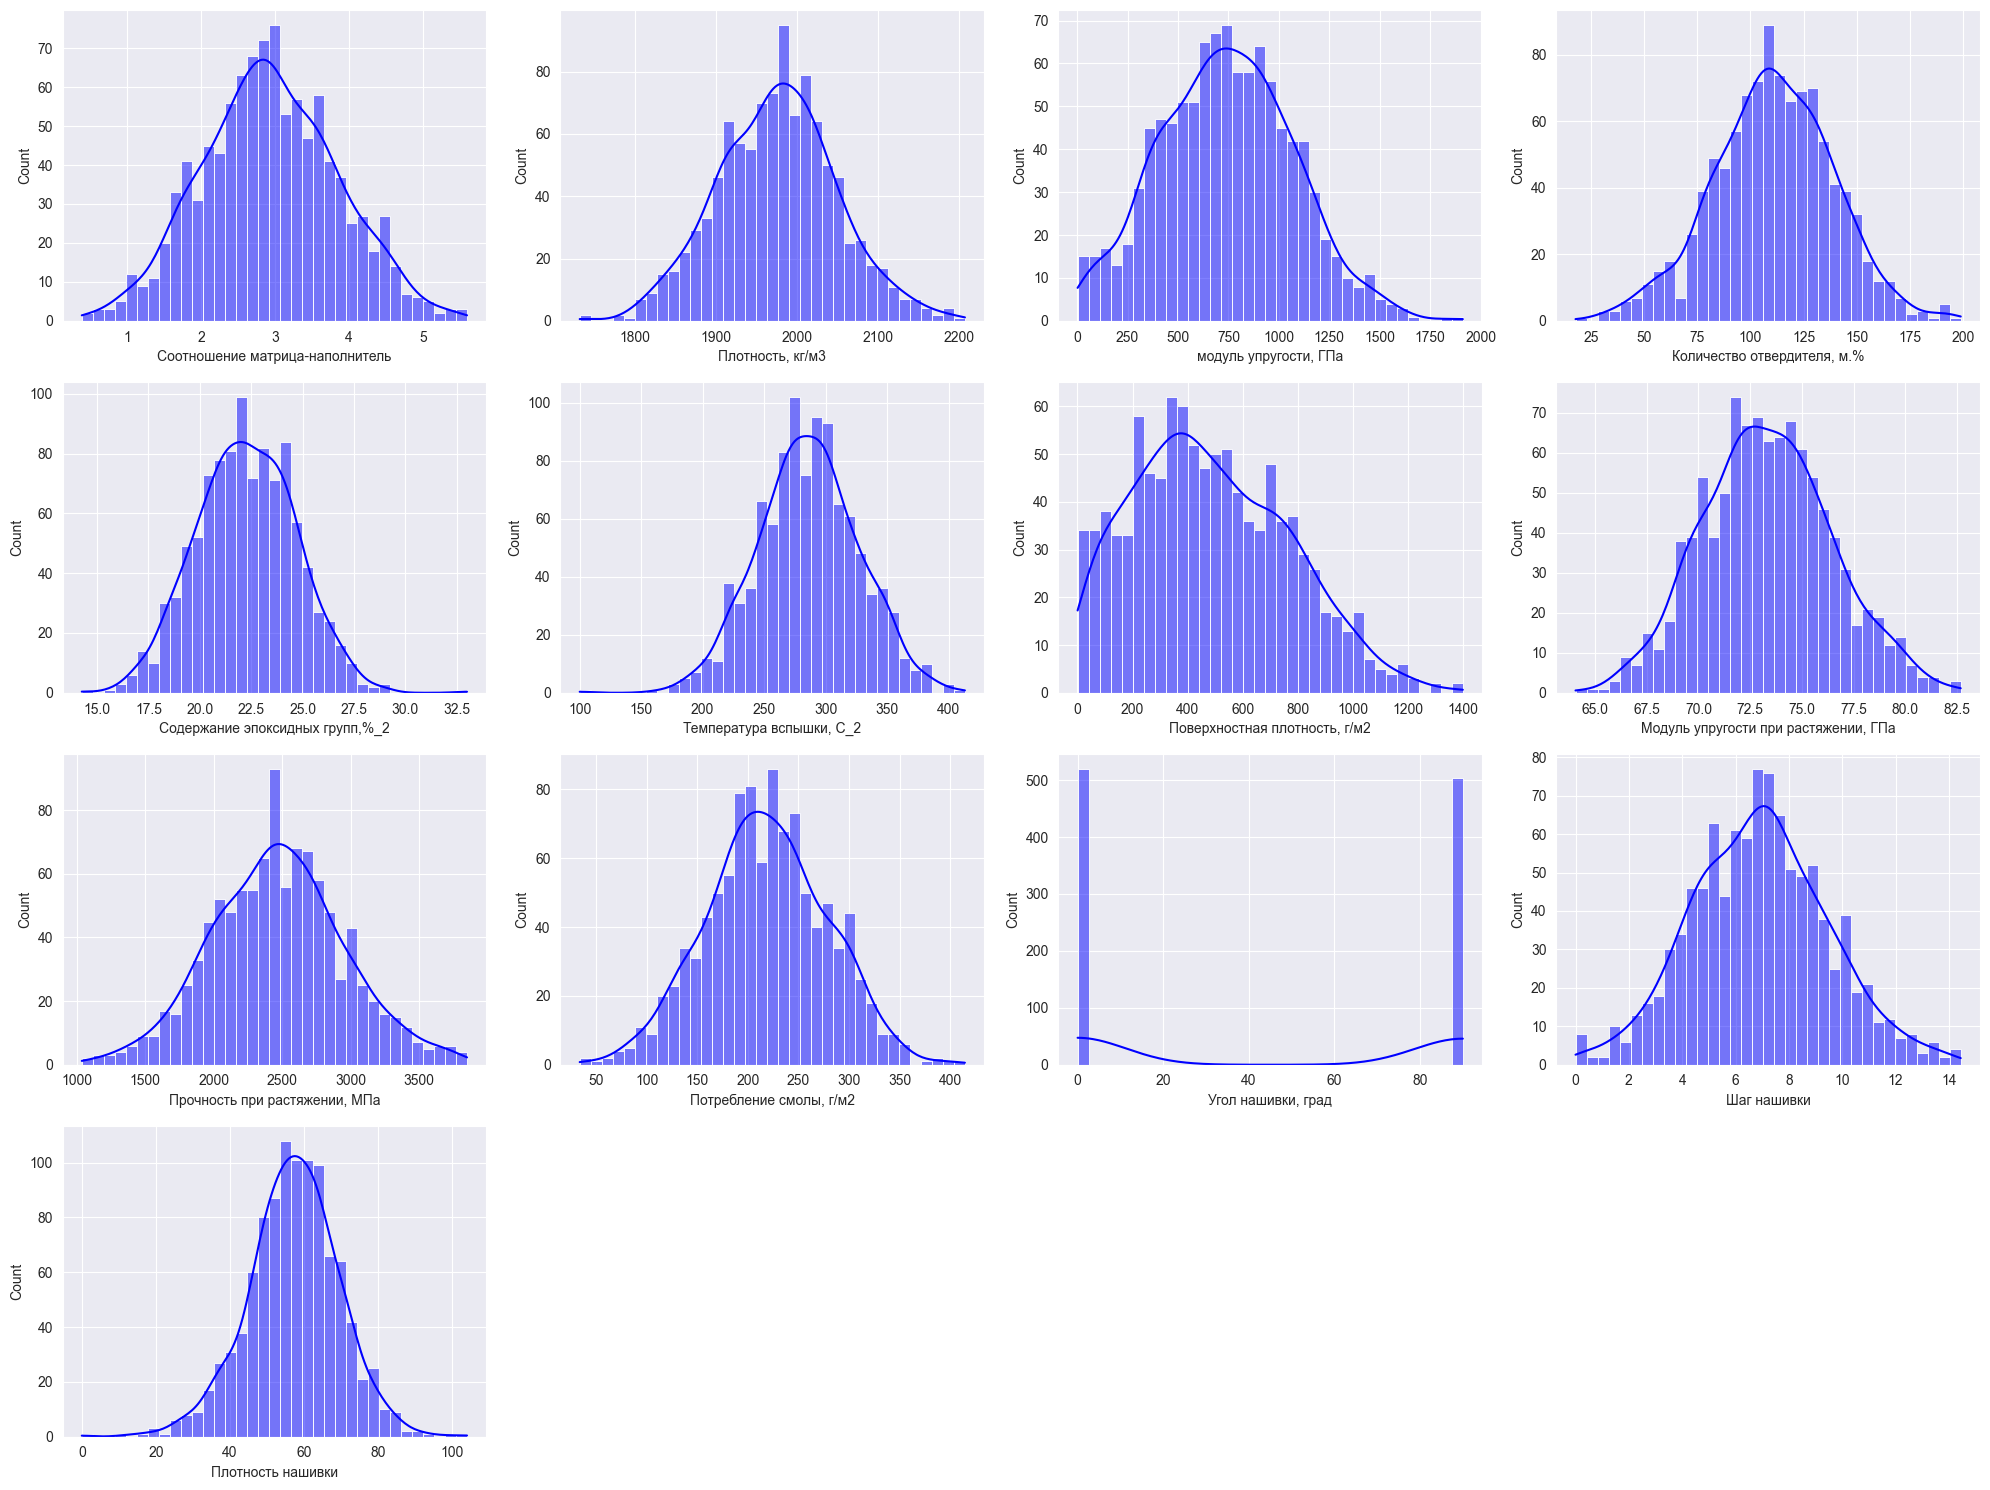

In [17]:
def histogram (df, n_rows, n_cols):
    fig=plt.figure(figsize=(20, 15))
    for i, column in enumerate(df.columns):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.histplot(data=df, x=column, kde=True, bins=35, color = 'blue')
    fig.tight_layout()
    plt.show()

histogram(df, 4, 4)

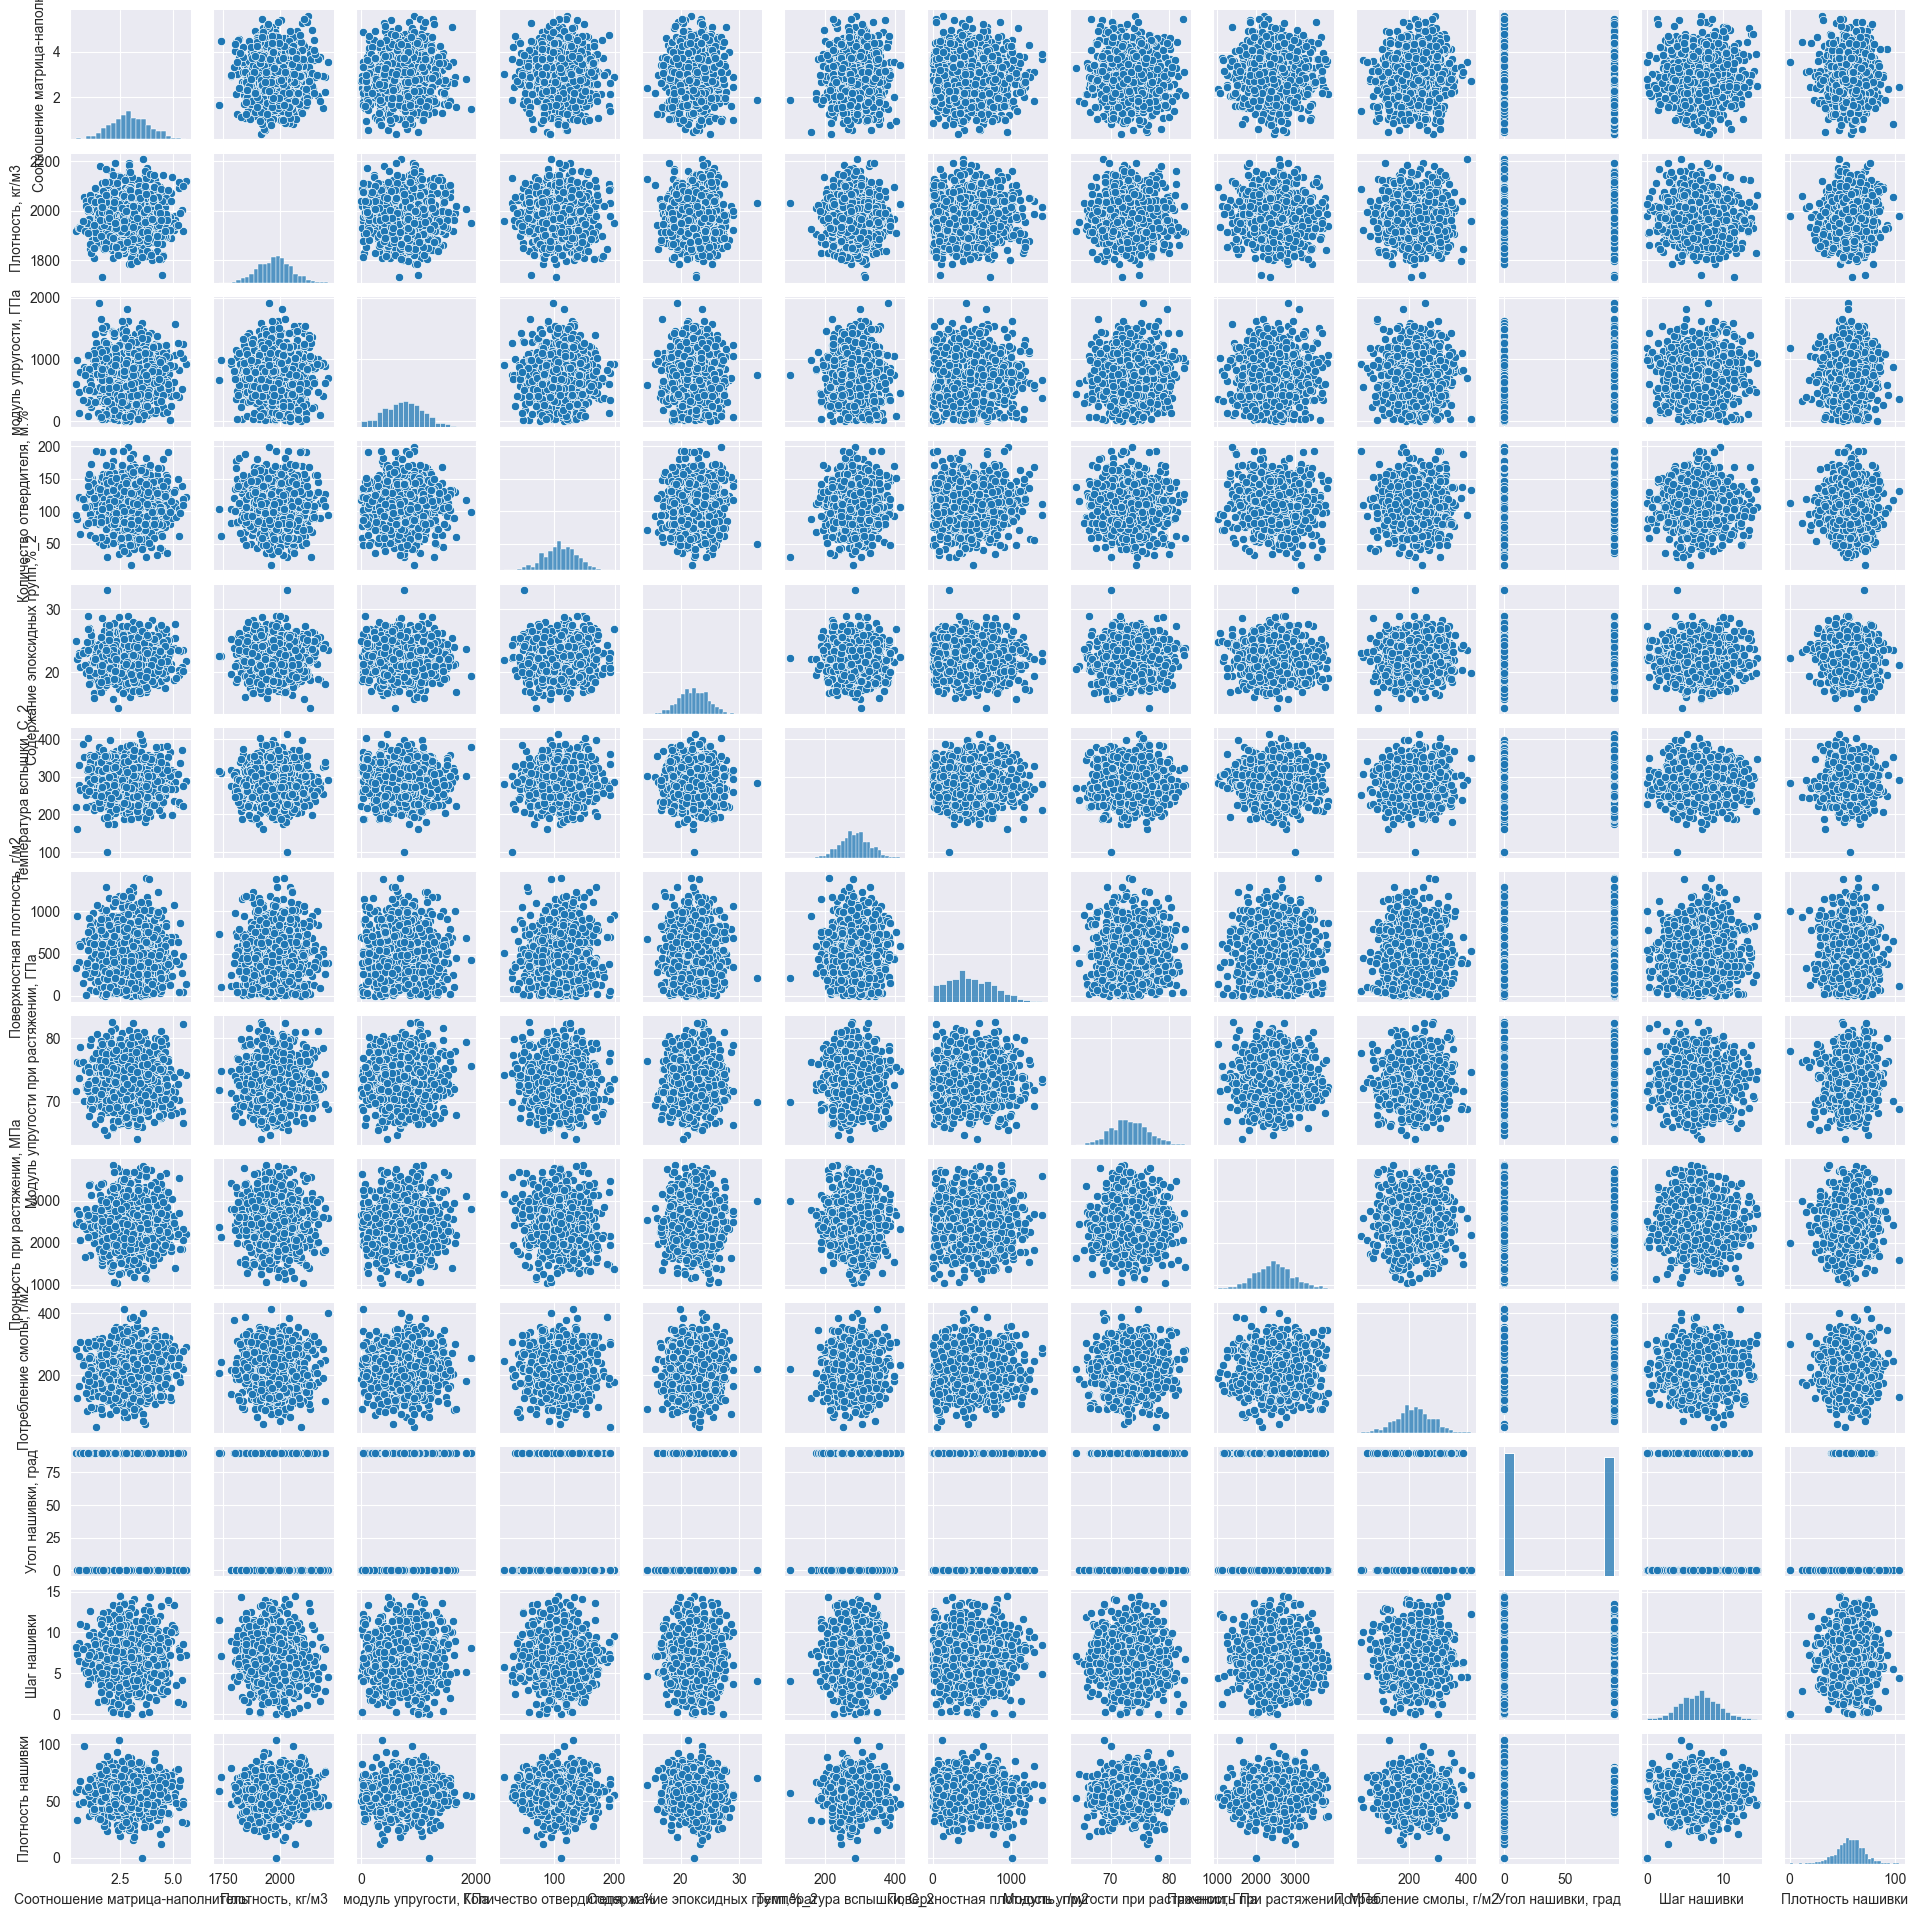

In [19]:
sns.pairplot(df, height=1.5)

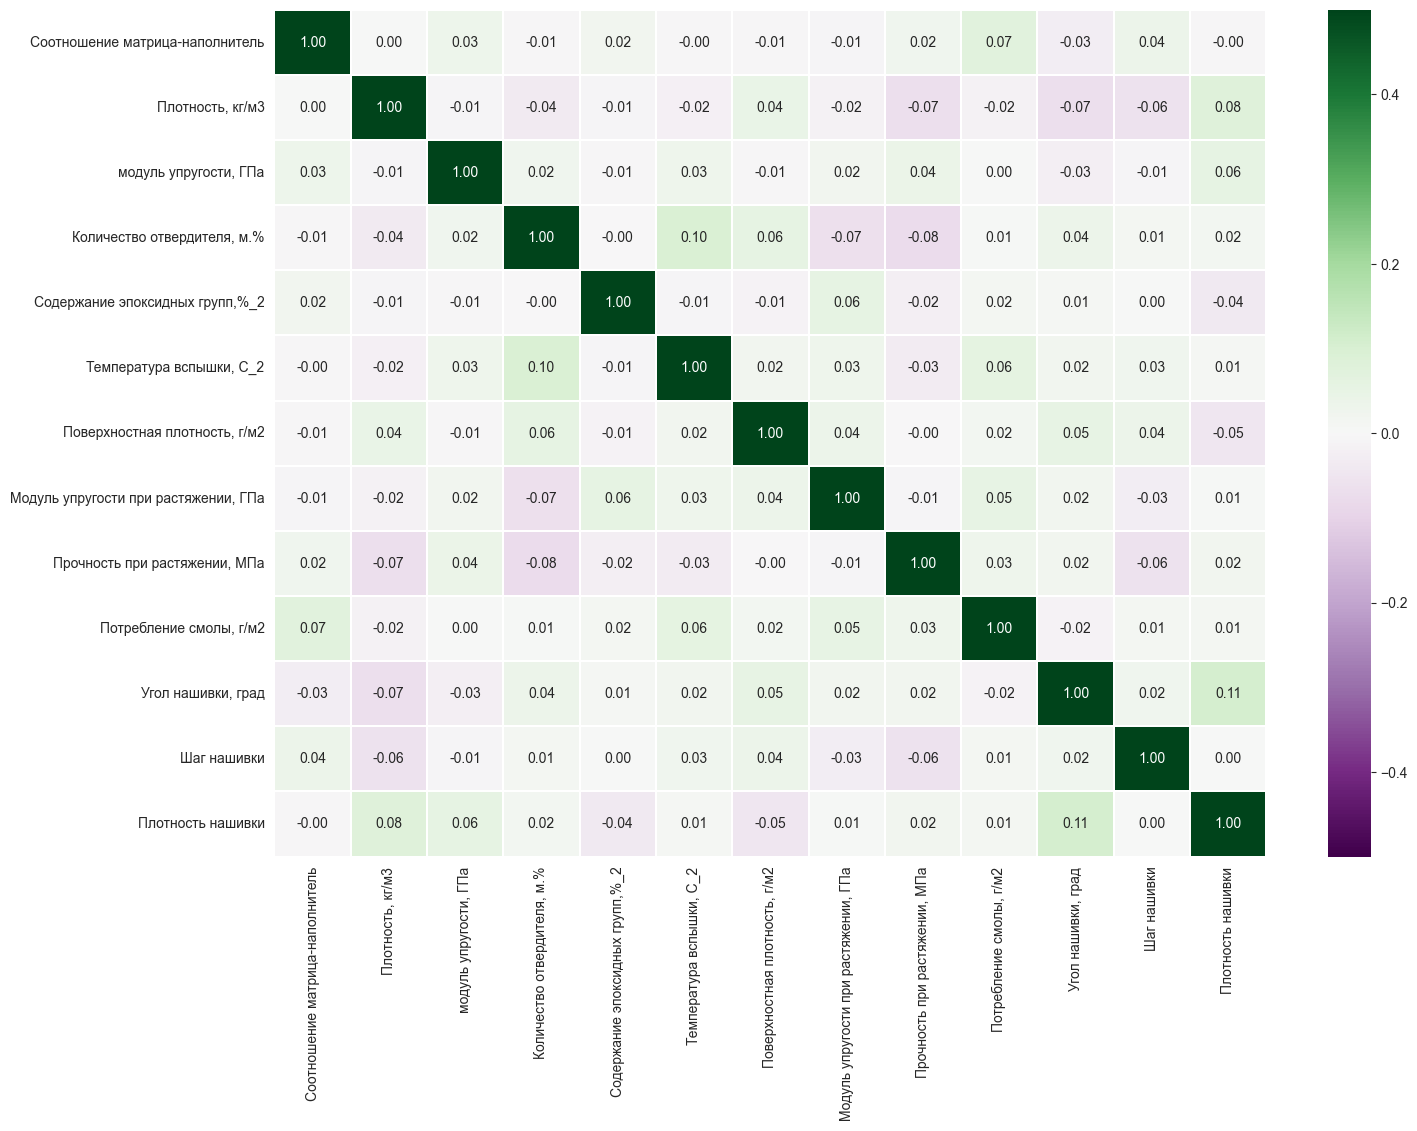

In [20]:
def get_corr(df):
  corr = df.corr()
  fig, ax = plt.subplots(figsize=(16, 11))
  sns.heatmap(corr, vmin=-0.5, vmax=0.5, annot=True, fmt='.2f',cmap='PRGn', ax=ax, linewidths = 0.1)
  plt.show()
get_corr(df)

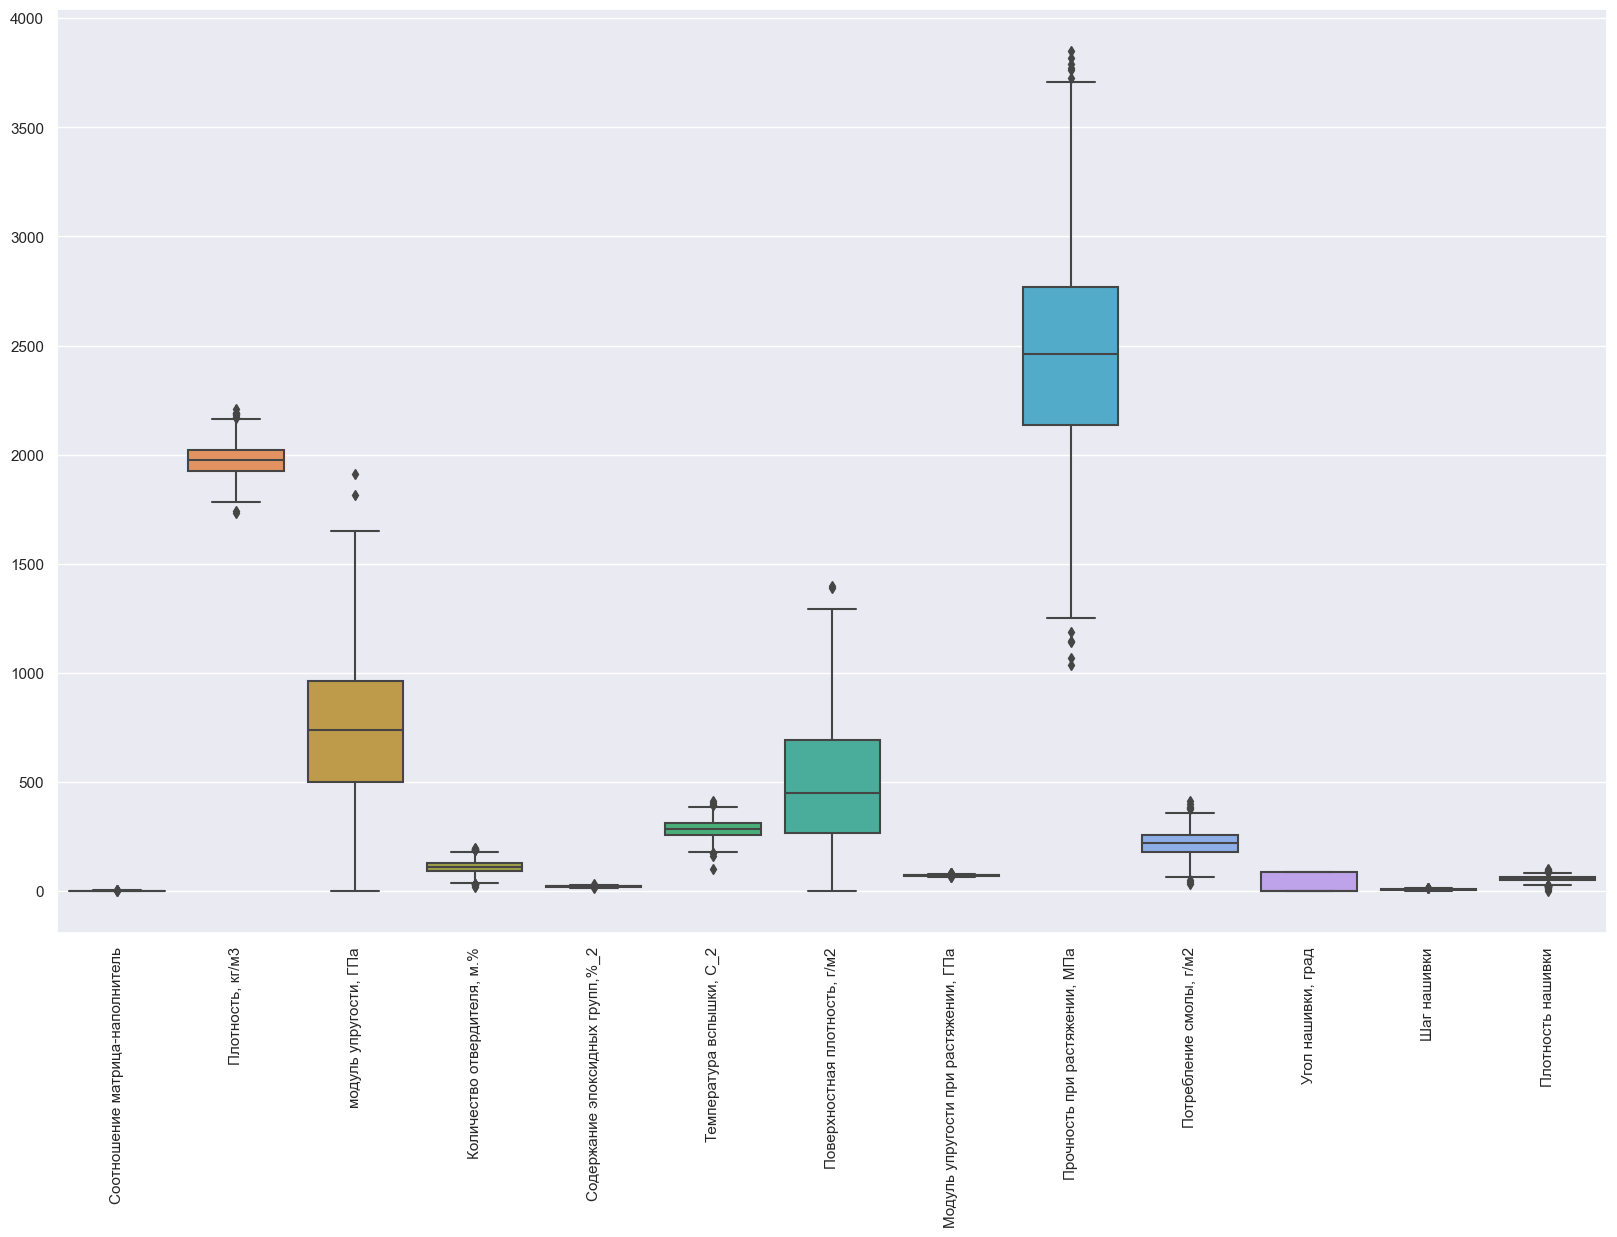

In [22]:
sns.set(rc={'figure.figsize':(20, 12)})
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [8]:
df.shape

(1023, 13)

In [23]:
# Колличество выбросов и аномальных значений в столбцах исходного dataset
i = 1 
count = 0
for name in df.columns:
    outlier = boxplot_stats(df[name])
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    count += len(outlier[0]['fliers'])
    i += 1
print(f'Общее число ошибок: {count}')

Количество выбросов в столбце  Соотношение матрица-наполнитель :  6
Количество выбросов в столбце  Плотность, кг/м3 :  9
Количество выбросов в столбце  модуль упругости, ГПа :  2
Количество выбросов в столбце  Количество отвердителя, м.% :  14
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  2
Количество выбросов в столбце  Температура вспышки, С_2 :  8
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  2
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  6
Количество выбросов в столбце  Прочность при растяжении, МПа :  11
Количество выбросов в столбце  Потребление смолы, г/м2 :  8
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  4
Количество выбросов в столбце  Плотность нашивки :  21
Общее число ошибок: 93


In [24]:
for i in df.columns:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan
df.dropna(inplace = True)
df.shape

(936, 13)

In [25]:
# Колличество выбросов и аномальных значений в столбцах исходного dataset
i = 1 
count = 0
for name in df.columns:
    outlier = boxplot_stats(df[name])
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    count += len(outlier[0]['fliers'])
    i += 1
print(f'Общее число ошибок: {count}')

Количество выбросов в столбце  Соотношение матрица-наполнитель :  0
Количество выбросов в столбце  Плотность, кг/м3 :  0
Количество выбросов в столбце  модуль упругости, ГПа :  1
Количество выбросов в столбце  Количество отвердителя, м.% :  0
Количество выбросов в столбце  Содержание эпоксидных групп,%_2 :  0
Количество выбросов в столбце  Температура вспышки, С_2 :  0
Количество выбросов в столбце  Поверхностная плотность, г/м2 :  0
Количество выбросов в столбце  Модуль упругости при растяжении, ГПа :  1
Количество выбросов в столбце  Прочность при растяжении, МПа :  4
Количество выбросов в столбце  Потребление смолы, г/м2 :  1
Количество выбросов в столбце  Угол нашивки, град :  0
Количество выбросов в столбце  Шаг нашивки :  0
Количество выбросов в столбце  Плотность нашивки :  3
Общее число ошибок: 10


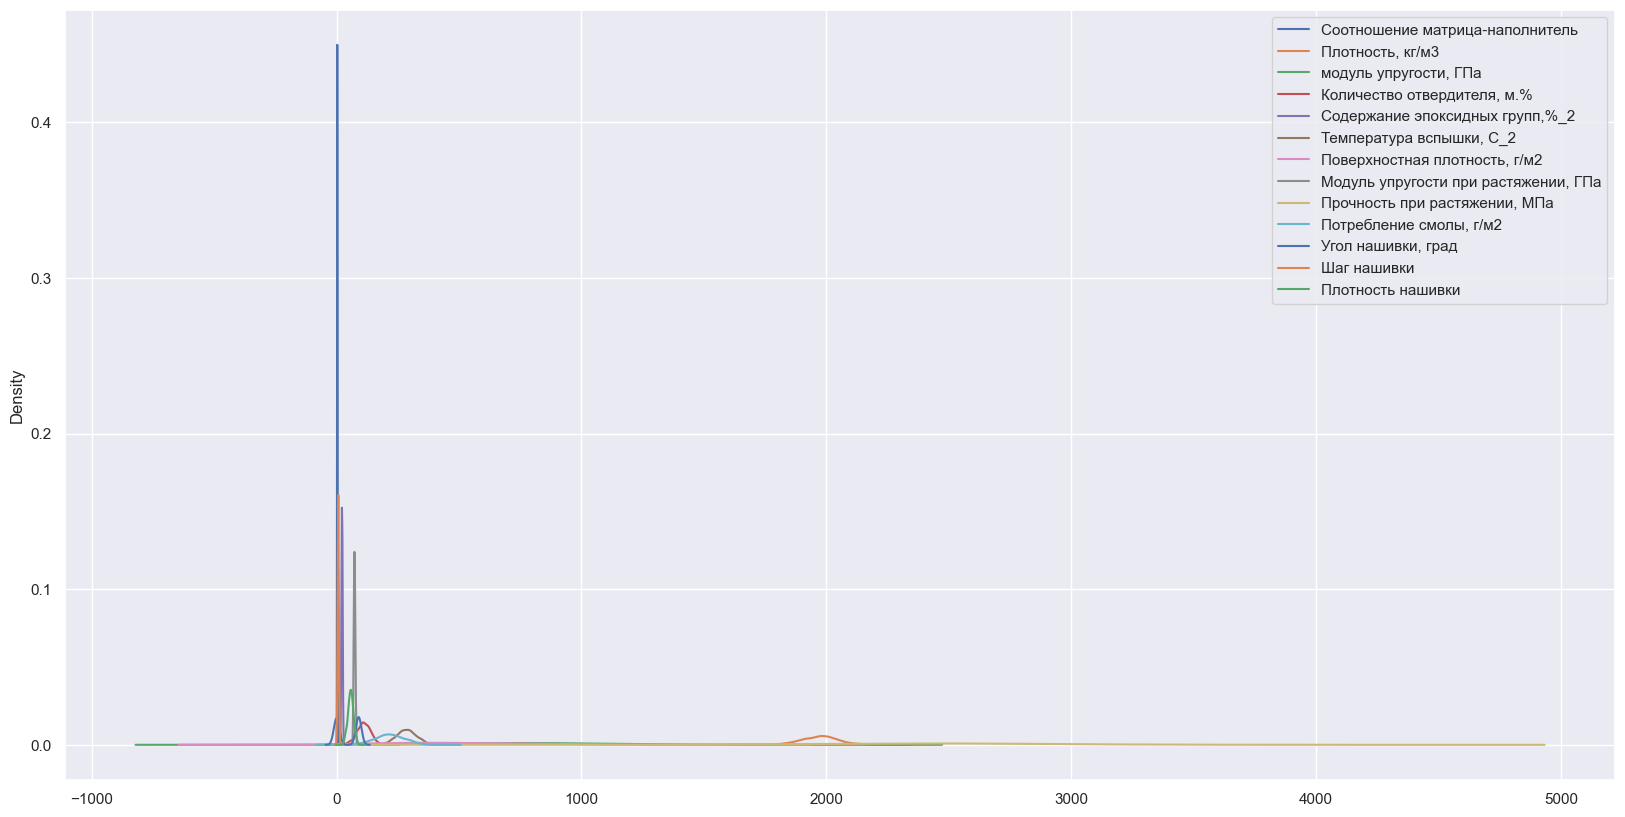

In [26]:
def plt_kde(df):
  fig, ax = plt.subplots(figsize=(20, 10))
  df.plot(kind='kde', ax=ax)
plt_kde(df)

In [27]:
scaler = MinMaxScaler()
columns = df.columns
df_n = scaler.fit_transform(np.array(df))
df_n = pd.DataFrame(df_n, columns=columns)
df_n.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.274768,0.651097,0.447061,0.079153,0.607435,0.509164,0.16223,0.280303,0.71259,0.529221,0.0,0.289334,0.557156
1,0.274768,0.651097,0.447061,0.630983,0.418887,0.583596,0.16223,0.280303,0.71259,0.529221,0.0,0.362355,0.335840
2,0.466552,0.651097,0.455721,0.511257,0.495653,0.509164,0.16223,0.280303,0.71259,0.529221,0.0,0.362355,0.506083
3,0.465836,0.571539,0.452685,0.511257,0.495653,0.509164,0.16223,0.280303,0.71259,0.529221,0.0,0.362355,0.557156
4,0.424236,0.332865,0.488508,0.511257,0.495653,0.509164,0.16223,0.280303,0.71259,0.529221,0.0,0.362355,0.727399


In [28]:
scaler.inverse_transform(np.array(df_n)[:1,:])

array([[1.85714286e+00, 2.03000000e+03, 7.38736842e+02, 5.00000000e+01,
        2.37500000e+01, 2.84615385e+02, 2.10000000e+02, 7.00000000e+01,
        3.00000000e+03, 2.20000000e+02, 0.00000000e+00, 4.00000000e+00,
        6.00000000e+01]])

In [29]:
df_n.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,936.0,0.498933,0.187489,0.0,0.372274,0.494538,0.629204,1.0
"Плотность, кг/м3",936.0,0.502695,0.187779,0.0,0.368517,0.511229,0.624999,1.0
"модуль упругости, ГПа",936.0,0.446764,0.199583,0.0,0.301243,0.447061,0.580446,1.0
"Количество отвердителя, м.%",936.0,0.504664,0.188865,0.0,0.376190,0.506040,0.637978,1.0
"Содержание эпоксидных групп,%_2",936.0,0.491216,0.180620,0.0,0.367716,0.489382,0.623410,1.0
"Температура вспышки, С_2",936.0,0.516059,0.190624,0.0,0.386128,0.515980,0.646450,1.0
"Поверхностная плотность, г/м2",936.0,0.373733,0.217078,0.0,0.205619,0.354161,0.538683,1.0
"Модуль упругости при растяжении, ГПа",936.0,0.488647,0.191466,0.0,0.359024,0.485754,0.615077,1.0
"Прочность при растяжении, МПа",936.0,0.495706,0.188915,0.0,0.365149,0.491825,0.612874,1.0
"Потребление смолы, г/м2",936.0,0.521141,0.195781,0.0,0.392067,0.523766,0.652447,1.0


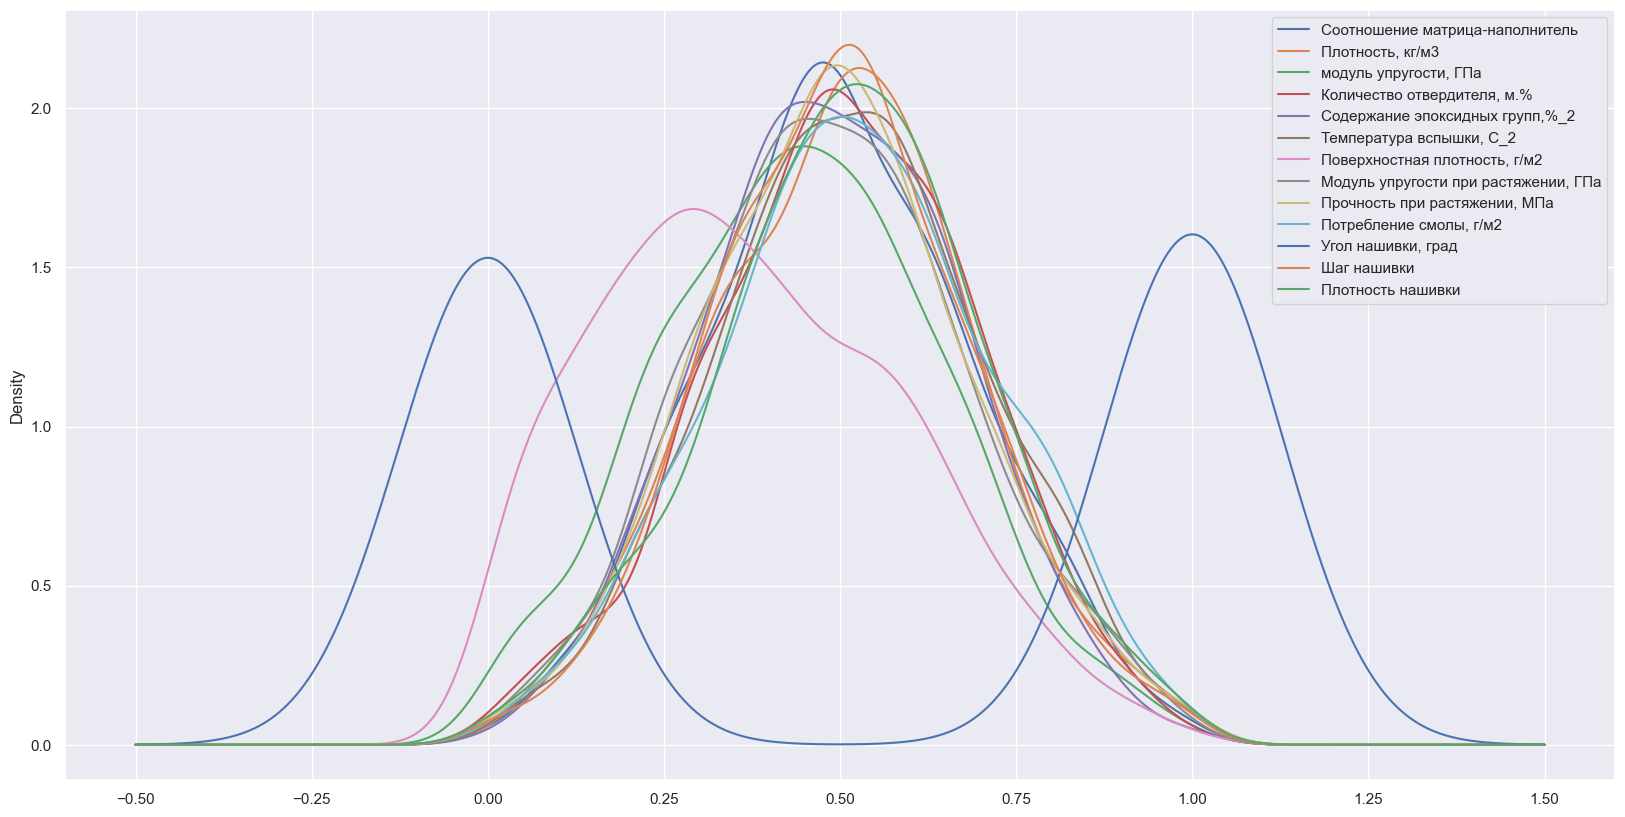

In [30]:
# распредление после нормализации
plt_kde(df_n)

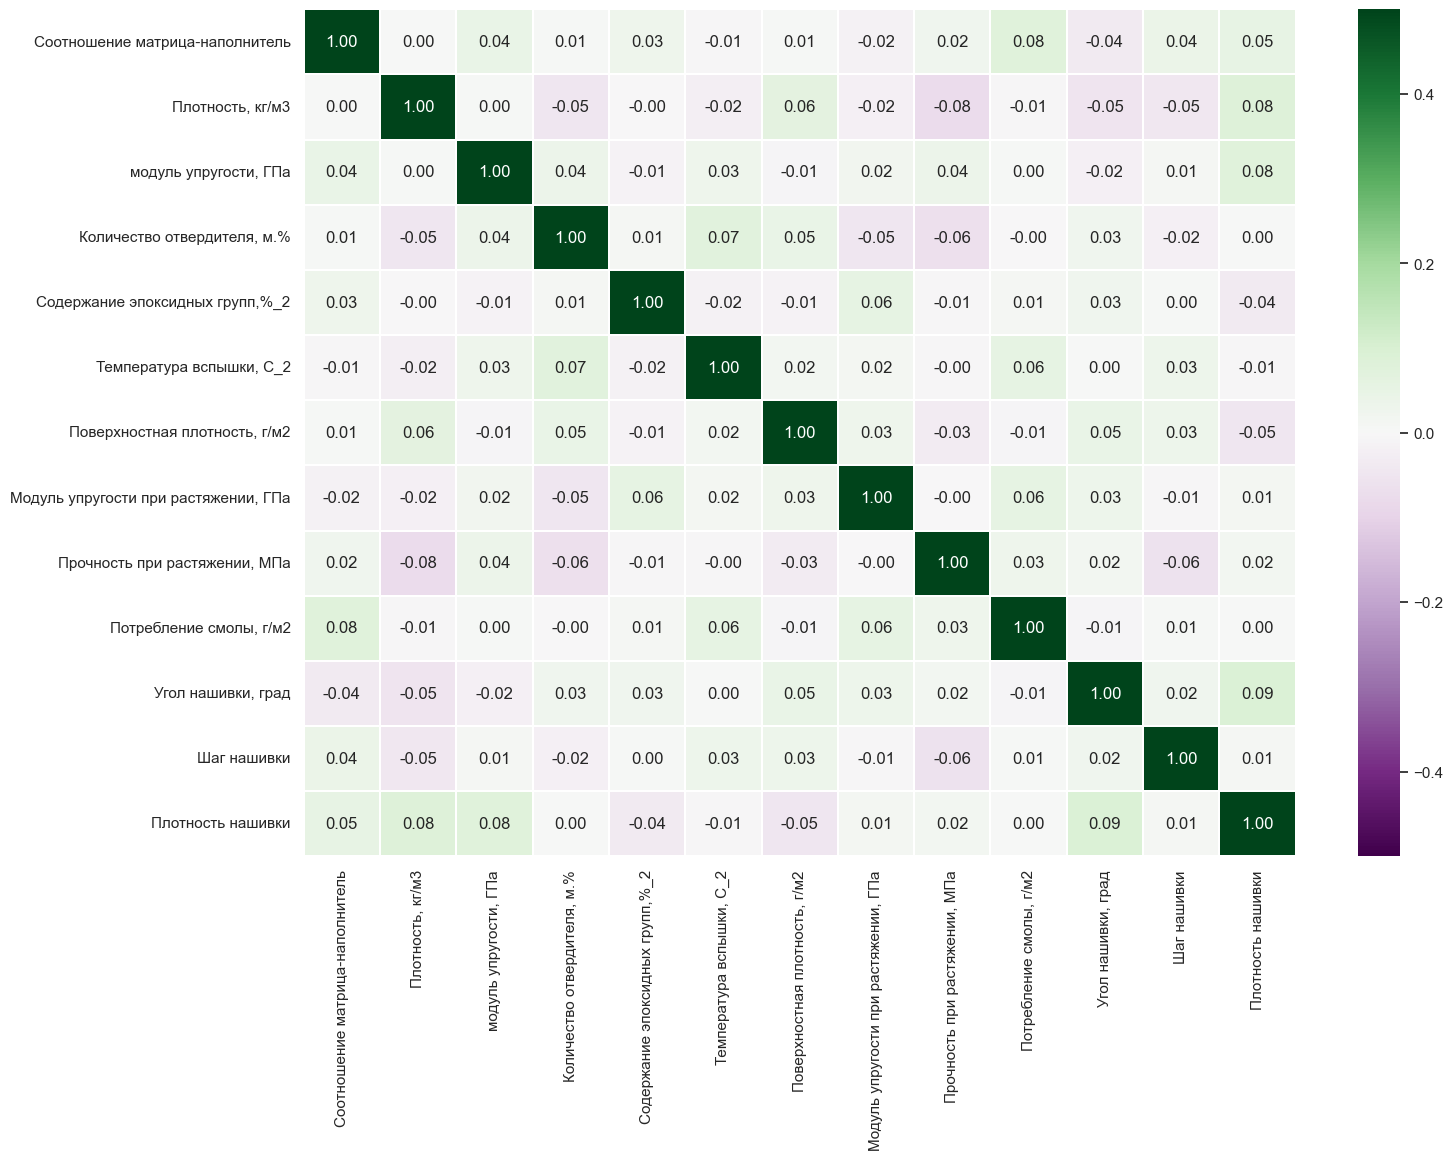

In [31]:
# Корреялция после нормализации
get_corr(df_n)

In [32]:
info_df = pd.DataFrame(columns=['target', 'model', 'MAE', 'MSE', 'MAPE', 'RMSE', 'R2'])

In [114]:
def info(model_name, y_pred, MAE, MSE, MAPE, RMSE, R2):
    global df
    df = pd.DataFrame({'model': model_name,
                 'target': 'Модуль упругости при растяжении, ГПа',
                 'MAE': MAE,
                 'MSE': MSE,
                 'MAPE': MAPE,
                 'RMSE': RMSE,
                 'R2': R2
                })
    global info_df
    info_df =  pd.concat([info_df, df], ignore_index=True)
    return info_df

In [34]:
train = df_n.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
target = df_n['Модуль упругости при растяжении, ГПа']
train.shape, target.shape

((936, 11), (936,))

In [35]:
X_train, X_test, y_train,y_test = train_test_split(train, target , test_size=0.33, random_state=0)

In [36]:
linear_model = LinearRegression().fit(X_train, y_train)
lr_pred = linear_model.predict(X_test)
lr = 'Linear Regression'

In [37]:
mae_lr = round(mean_absolute_error(y_test, lr_pred), 3)
mse_lr = round(mean_squared_error(y_test, lr_pred), 3)
mape_lr = round(mean_absolute_percentage_error(y_test, lr_pred), 3)
rmse_lr = round(np.sqrt(mean_squared_error(y_test, lr_pred)), 3)
R2_lr = round(r2_score(y_test, lr_pred), 3)

In [38]:
info(target, lr, lr_pred, mae_lr, mse_lr, mape_lr, rmse_lr, R2_lr)
info_df

,target,model,MAE,MSE,MAPE,RMSE,R2
0,Модуль упругости и Прочность,Linear Regression,0.142,0.032,0.56,0.178,-0.018


In [39]:
lasso_model = Lasso()
param = {'alpha':[100.0, 200.0, 290.0, 300.0]}
lasso_model = GridSearchCV(estimator=lasso_model,
                           param_grid=param,
                           scoring='neg_mean_squared_error',
                           cv=10
                          ).fit(X_train,y_train)
lasso = 'Lasso Regression'

In [40]:
lasso_model.best_params_

{'alpha': 100.0}

In [41]:
model_lasso = Lasso(alpha=100).fit(X_train, y_train)
lasso_pred = model_lasso.predict(X_test)

In [42]:
mae_lasso = round(mean_absolute_error(y_test, lasso_pred), 3)
mse_lasso = round(mean_squared_error(y_test, lasso_pred), 3)
mape_lasso = round(mean_absolute_percentage_error(y_test, lasso_pred), 3)
rmse_lasso = round(np.sqrt(mean_squared_error(y_test, lasso_pred)), 3)
R2_lasso = round(r2_score(y_test, lasso_pred), 3)

In [43]:
info(target, lasso, lasso_pred, mae_lasso, mse_lasso, mape_lasso, rmse_lasso, R2_lasso)
info_df

,target,model,MAE,MSE,MAPE,RMSE,R2
0,Модуль упругости и Прочность,Linear Regression,0.142,0.032,0.560,0.178,-0.018
1,Модуль упругости и Прочность,Lasso Regression,0.141,0.031,0.552,0.176,-0.002


In [44]:
# задаем значения параметров
param_grid = {'n_estimators':[64,100,128,140]}
model = RandomForestRegressor()
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=10
                         ).fit(X_train,y_train)
forest = 'Random Forest'

In [45]:
grid_model.best_params_

{'n_estimators': 128}

In [46]:
model_forest = RandomForestRegressor(n_estimators=128)

In [47]:
model_forest.fit(X_train,y_train)
forest_pred = model_forest.predict(X_test)

In [48]:
mae_rf = round(mean_absolute_error(y_test, forest_pred), 3)
mse_rf = round(mean_squared_error(y_test, forest_pred), 3)
mape_rf = round(mean_absolute_percentage_error(y_test, forest_pred), 3)
rmse_rf = round(np.sqrt(mean_squared_error(y_test, forest_pred)), 3)
R2_rf = round(r2_score(y_test, forest_pred), 3)

In [49]:
info(target, forest, forest_pred, mae_rf, mse_rf, mape_rf, rmse_rf, R2_rf)
info_df

,target,model,MAE,MSE,MAPE,RMSE,R2
0,Модуль упругости и Прочность,Linear Regression,0.142,0.032,0.560,0.178,-0.018
1,Модуль упругости и Прочность,Lasso Regression,0.141,0.031,0.552,0.176,-0.002
2,Модуль упругости и Прочность,Random Forest,0.142,0.032,0.574,0.180,-0.041


In [50]:
knn_model = KNeighborsRegressor()
param_grid_knn = {'n_neighbors':[20,30,35,39]}
grid_knn = GridSearchCV(estimator=knn_model,
                        param_grid=param_grid_knn,
                        scoring='neg_mean_squared_error',
                        cv=10
                       ).fit(X_train, y_train)
knn = 'K Neighbors Regressor'

In [51]:
grid_knn.best_params_

{'n_neighbors': 39}

In [52]:
model_knn = KNeighborsRegressor(n_neighbors=39)
model_knn.fit(X_train, y_train)
knn_pred = model_knn.predict(X_test)

In [53]:
mae_knn = round(mean_absolute_error(y_test, knn_pred), 3)
mse_knn = round(mean_squared_error(y_test, knn_pred), 3)
mape_knn = round(mean_absolute_percentage_error(y_test, knn_pred), 3)
rmse_knn = round(np.sqrt(mean_squared_error(y_test, knn_pred)), 3)
R2_knn = round(r2_score(y_test, knn_pred), 3)

In [54]:
info(target, knn, knn_pred, mae_knn, mse_knn, mape_knn, rmse_knn, R2_knn)
info_df

,target,model,MAE,MSE,MAPE,RMSE,R2
0,Модуль упругости и Прочность,Linear Regression,0.142,0.032,0.560,0.178,-0.018
1,Модуль упругости и Прочность,Lasso Regression,0.141,0.031,0.552,0.176,-0.002
2,Модуль упругости и Прочность,Random Forest,0.142,0.032,0.574,0.180,-0.041
3,Модуль упругости и Прочность,K Neighbors Regressor,0.142,0.031,0.540,0.176,0.005


In [55]:
svr_model = SVR()
param_grid = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma':['scale', 'auto'],
              'C':[0.5, 1.0, 1.5, 2.0]
             }
model_svr = GridSearchCV(estimator=svr_model,
                         param_grid=param_grid,
                         scoring='neg_mean_squared_error',
                         cv=10
                        ).fit(X_train, y_train)
svr = 'SVR'

In [56]:
model_svr.best_params_

{'C': 0.5, 'gamma': 'auto', 'kernel': 'poly'}

In [57]:
model_svr = SVR(C=0.5, gamma='auto', kernel='poly')
model_svr.fit(X_train, y_train)
svr_pred = model_svr.predict(X_test)

In [58]:
mae_svr = round(mean_absolute_error(y_test, svr_pred), 3)
mse_svr = round(mean_squared_error(y_test, svr_pred), 3)
mape_svr = round(mean_absolute_percentage_error(y_test, svr_pred), 3)
rmse_svr = round(np.sqrt(mean_squared_error(y_test, svr_pred)), 3)
R2_svr = round(r2_score(y_test, svr_pred), 3)

In [59]:
info(target, svr, svr_pred, mae_svr, mse_svr, mape_svr, rmse_svr, R2_svr)
info_df

,target,model,MAE,MSE,MAPE,RMSE,R2
0,Модуль упругости и Прочность,Linear Regression,0.142,0.032,0.560,0.178,-0.018
1,Модуль упругости и Прочность,Lasso Regression,0.141,0.031,0.552,0.176,-0.002
2,Модуль упругости и Прочность,Random Forest,0.142,0.032,0.574,0.180,-0.041
3,Модуль упругости и Прочность,K Neighbors Regressor,0.142,0.031,0.540,0.176,0.005
4,Модуль упругости и Прочность,SVR,0.141,0.031,0.547,0.176,0.002


In [124]:
train = df_n.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
target = df_n['Прочность при растяжении, МПа']
train.shape, target.shape

((936, 11), (936,))

In [125]:
info_df_2 = pd.DataFrame(columns=['target', 'model', 'MAE', 'MSE', 'MAPE', 'RMSE', 'R2'])

In [126]:
def info_2(model_name, y_pred, MAE, MSE, MAPE, RMSE, R2):
    df = pd.DataFrame({'model': model_name,
                 'target': 'Прочность при растяжении, МПа',
                 'MAE': MAE,
                 'MSE': MSE,
                 'MAPE': MAPE,
                 'RMSE': RMSE,
                 'R2': R2
                })
    global info_df_2
    info_df_2 =  pd.concat([info_df_2, df], ignore_index=True)
    return info_df_2

In [127]:
X_train, X_test, y_train,y_test = train_test_split(train, target , test_size=0.33, random_state=0)

In [128]:
linear_model = LinearRegression().fit(X_train, y_train)
lr_pred = linear_model.predict(X_test)
lr = 'Linear Regression'

In [132]:
mae_lr = round(mean_absolute_error(y_test, lr_pred), 3)
mse_lr = round(mean_squared_error(y_test, lr_pred), 3)
mape_lr = round(mean_absolute_percentage_error(y_test, lr_pred), 3)
rmse_lr = round(np.sqrt(mean_squared_error(y_test, lr_pred)), 3)
R2_lr = round(r2_score(y_test, lr_pred), 3)

In [ ]:
доделать для 'Прочность при растяжении, МПа'

In [68]:
y

1       1.857143
3       1.857143
4       2.771331
5       2.767918
6       2.569620
          ...   
1018    2.271346
1019    3.444022
1020    3.280604
1021    3.705351
1022    3.808020
Name: Соотношение матрица-наполнитель, Length: 936, dtype: float64

In [80]:
X = df_n.drop('Соотношение матрица-наполнитель', axis=1)
y = df_n['Соотношение матрица-наполнитель']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [82]:
# размеры обучающих и тестовых наборов данных
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

X_train: (655, 12)
X_test: (281, 12)
y_train: (655,)
y_test: (281,)


In [83]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 1])
    plt.xlabel('Эпоха')

    plt.ylabel('MAE [MPG]')
    plt.legend()
    plt.grid(True)
model = Sequential()
model.add(layers.Dense(50, input_dim=X.shape[1], activation='relu'))
model.add(layers.Dropout(0.12))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.12))
model.add(layers.Dense(19, activation='relu'))
model.add(layers.Dropout(0.12))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.12))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1))

In [86]:
model.summary()
dfmodel = model.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1,
    epochs=60)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                650       
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 128)               6528      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 19)                2451      
                                                                 
 dropout_6 (Dropout)         (None, 19)                0         
                                                                 
 dense_9 (Dense)             (None, 64)               

17/17 [==============================] - 0s 7ms/step - loss: 0.1468 - mae: 0.1468 - val_loss: 0.1499 - val_mae: 0.1499
Epoch 51/60
17/17 [==============================] - 0s 7ms/step - loss: 0.1467 - mae: 0.1467 - val_loss: 0.1494 - val_mae: 0.1494
Epoch 52/60
17/17 [==============================] - 0s 7ms/step - loss: 0.1470 - mae: 0.1470 - val_loss: 0.1522 - val_mae: 0.1522
Epoch 53/60
17/17 [==============================] - 0s 7ms/step - loss: 0.1478 - mae: 0.1478 - val_loss: 0.1530 - val_mae: 0.1530
Epoch 54/60
17/17 [==============================] - 0s 7ms/step - loss: 0.1442 - mae: 0.1442 - val_loss: 0.1518 - val_mae: 0.1518
Epoch 55/60
17/17 [==============================] - 0s 6ms/step - loss: 0.1449 - mae: 0.1449 - val_loss: 0.1504 - val_mae: 0.1504
Epoch 56/60
17/17 [==============================] - 0s 7ms/step - loss: 0.1456 - mae: 0.1456 - val_loss: 0.1501 - val_mae: 0.1501
Epoch 57/60
17/17 [==============================] - 0s 8ms/step - loss: 0.1450 - mae: 0.1450 -

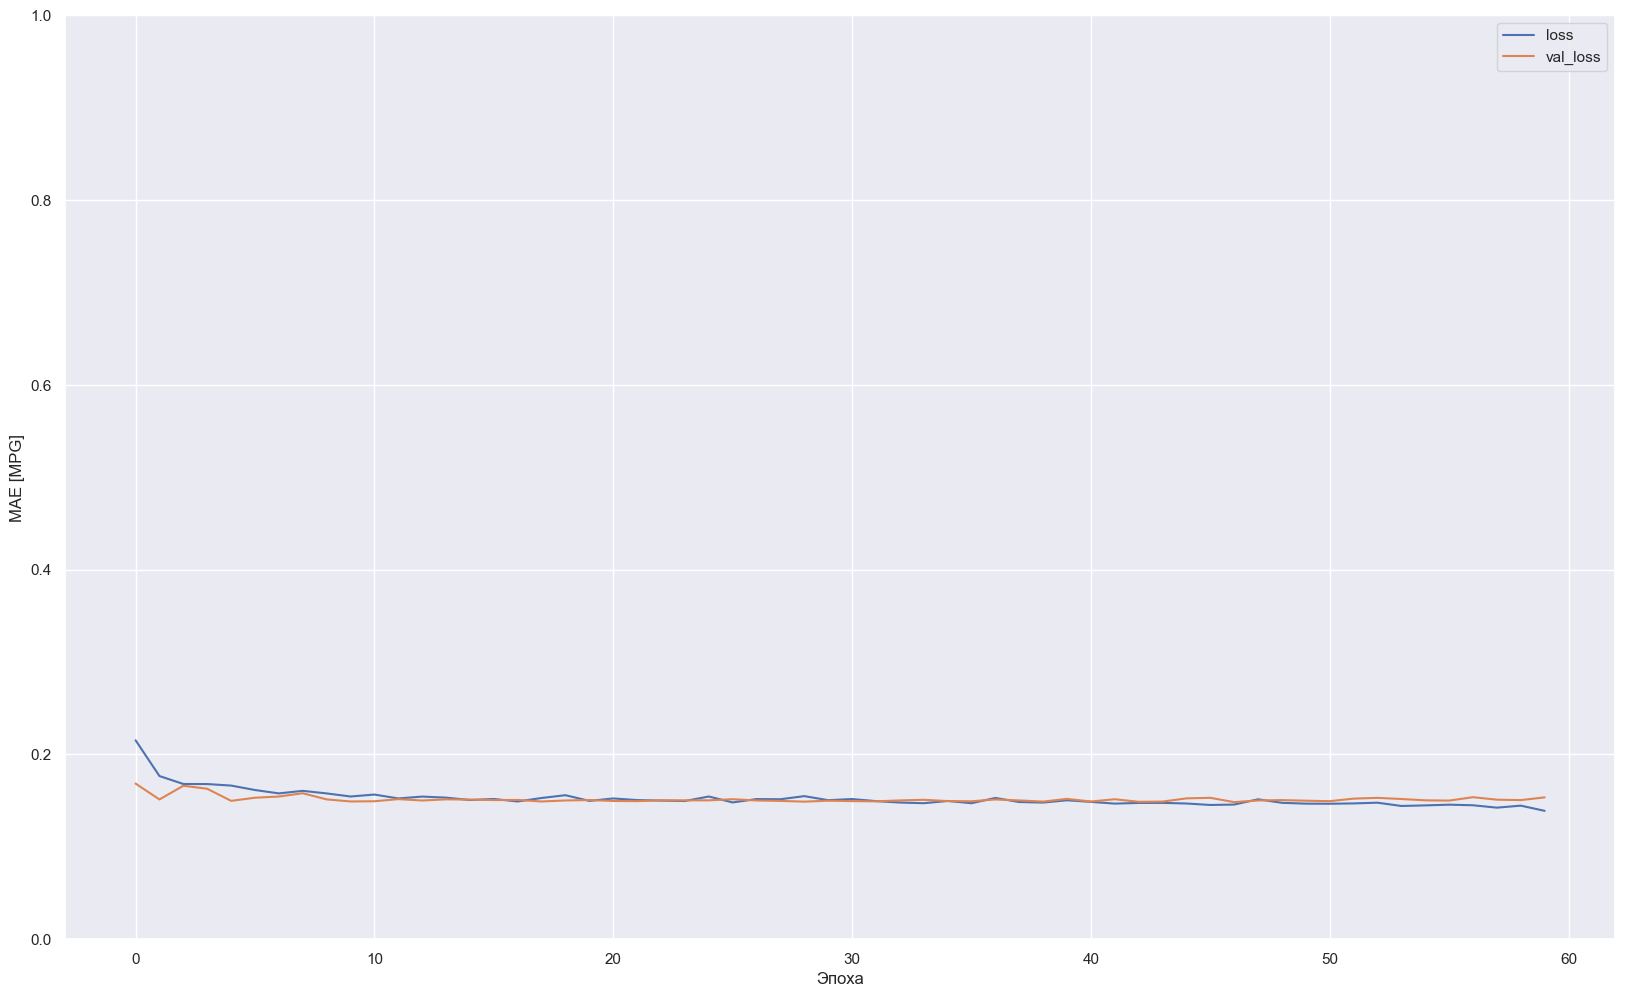

In [87]:
plot_loss(history)

9/9 [==============================] - 0s 2ms/step


Text(0.5, 0, 'Порядок')

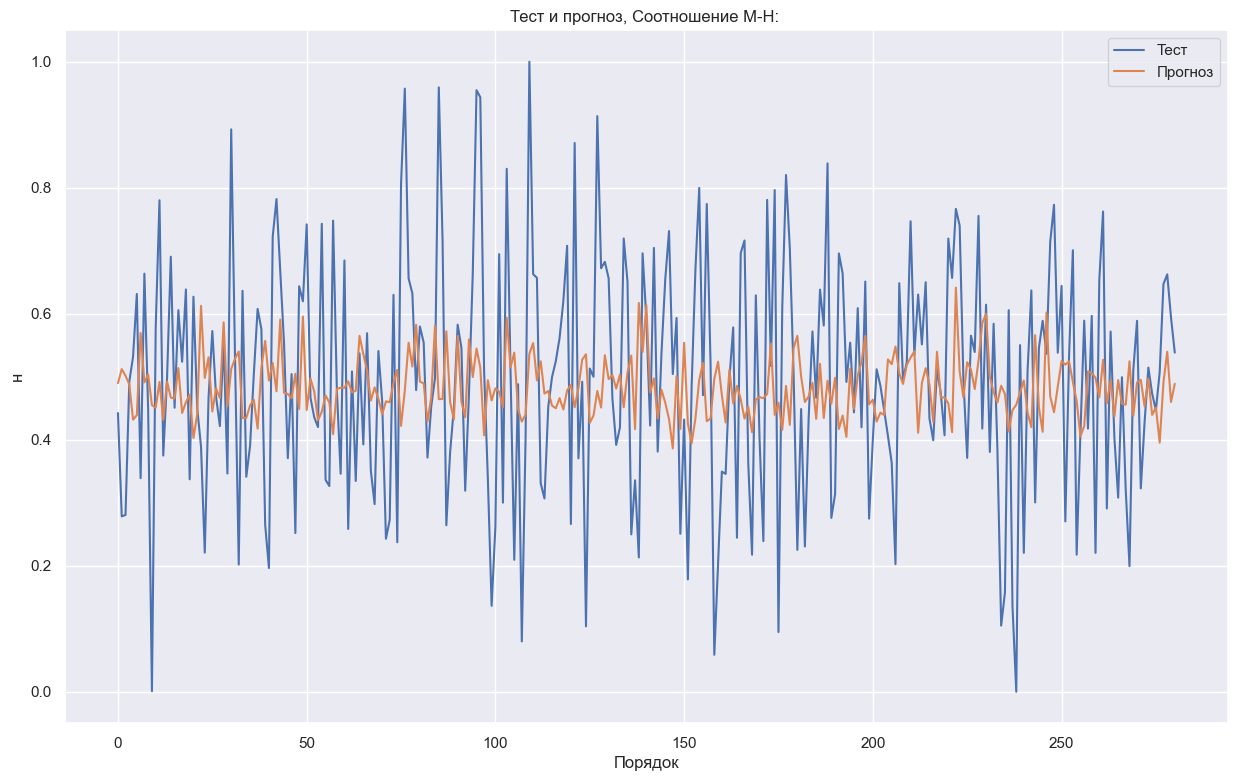

In [88]:
  plt.figure(figsize=(15,9))
  plt.title(f'Тест и прогноз, Соотношение М-Н: ')
  plt.plot(y_test.to_numpy(), label='Тест')
  plt.plot(model.predict(X_test), label='Прогноз')
  plt.legend(loc='best')
  plt.ylabel('н')
  plt.xlabel('Порядок')

In [89]:
model.evaluate(X_test, y_test, verbose=1)

9/9 [==============================] - 0s 3ms/step - loss: 0.1553 - mae: 0.1553


[0.15527001023292542, 0.15527001023292542]